In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads (2).csv to Social_Network_Ads (2).csv


In [3]:
df = pd.read_csv('Social_Network_Ads (2).csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.shape

(400, 5)

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier


In [8]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Define Base Models**

In [11]:
base_models = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

**Define Meta Model**            
Meta model decides how to combine predictions

In [12]:
meta_model = LogisticRegression()


**Build Stacking Classifier**

In [13]:
classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model,cv=5)
classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(max_depth=3)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [15]:
y_pred = classifier.predict(X_test)

In [17]:
print("Acuuracy Score: ",accuracy_score(y_test, y_pred))


Acuuracy Score:  0.9


<Axes: >

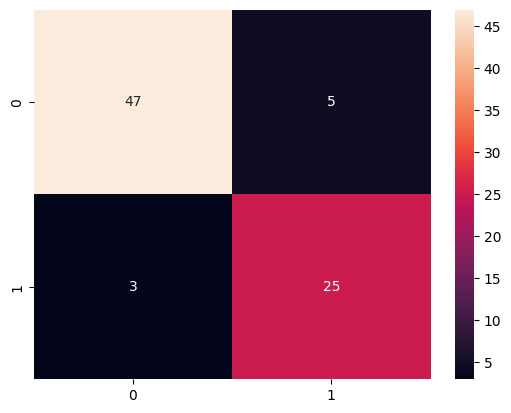

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

**Task: House Sales Dataset**



In [19]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [20]:
df = pd.read_csv('kc_house_data.csv')

In [21]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [27]:
df = df.drop(['id'], axis=1)


In [28]:
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df = df.drop(['date'], axis=1)


In [29]:
X = df.drop('price', axis=1)
y = df['price']

In [30]:
X.isnull().sum()


,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
grade,0
sqft_above,0


In [31]:
X = pd.get_dummies(X, columns=['zipcode'], drop_first=True)


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [34]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [35]:
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(
        n_estimators=100, random_state=42, n_jobs=-1)),
    ('gbr', GradientBoostingRegressor(random_state=42))
]


In [36]:
meta_model = Ridge(alpha=1.0)


In [37]:
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)


In [38]:
stack_model.fit(X_train, y_train)


StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=42)),
                              ('gbr',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=Ridge(), n_jobs=-1)

In [39]:
y_pred = stack_model.predict(X_test)


In [46]:

from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


R2 Score: 0.872056202213833
MSE: 19342122702.968822
RMSE: 139075.96019071311


In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(
        max_depth=10,
        random_state=42
    )),
    ('knn', KNeighborsRegressor(
        n_neighbors=10
    ))
]


In [49]:
from sklearn.linear_model import LinearRegression

meta_model = LinearRegression()


In [50]:
from sklearn.ensemble import StackingRegressor

stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)


In [53]:
stack_model.fit(X_train, y_train)



StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('dt',
                               DecisionTreeRegressor(max_depth=10,
                                                     random_state=42)),
                              ('knn', KNeighborsRegressor(n_neighbors=10))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [54]:
y_pred = stack_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.8662770028247178
MSE: 20215803066.0921
RMSE: 142182.28815887053
